In [2]:
import os
import sys
import random
import numpy as np
import matplotlib.pylab as plt
import torch
from torchvision import transforms
import pandas as pd
import seaborn as sns

sys.path.append('../.')
from data_perp import TestCropDataset
from models import VisTransformer
import utils

In [3]:
def show_pred(sample, target, pred, s_size=None):
    fig = plt.figure(figsize=(10,8))
    row, cols = 2, 5
    if target == 1:
        label = 'human'
    else:
        label = 'bg'
    if s_size:
        plt.title(label + f' | pred: {pred:.2f}\n sample size: {s_size}')
    else:
        plt.title(label + f' | pred: {pred:.2f}')

    plt.axis('off')

    for i in range(len(sample)):
        img  = sample[i]
        fig.add_subplot(row, cols, i+1)
        #plt.title(str(img.size[:2]))
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    plt.tight_layout()
    plt.show()

def show_sample(sample , target):
    fig = plt.figure(figsize=(8,8))
    row, cols = 2, 5
    if target == 1:
        label = 'human'
    else:
        label = 'bg'
    plt.title(label + f' | ')
    plt.axis('off')

    for i in range(len(sample)):
        img  = sample[i]
        fig.add_subplot(row, cols, i+1)
        plt.title(str(img.shape[:2]))
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    plt.show()

In [4]:
model = VisTransformer(1)
weights_path = "/home/max/ieos/small_obj/vid_pred/runs/exp2.1_obj_nblocks1_ep50/models/best_loss_0.06.pth"
model.load_state_dict(torch.load(weights_path))
model.eval()

mean = [0.485, 0.456, 0.406, 0.485, 0.456, 0.406,0.485, 0.456, 0.406, 0.406]
std = [0.229, 0.224, 0.225, 0.229, 0.224, 0.225, 0.229, 0.224, 0.225, 0.225]
sample_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,
    std=std)
    ])
sample_transforms_non = transforms.Compose([
    transforms.ToTensor(),
    ])
target_transforms = transforms.Lambda(lambda x: torch.tensor([x], dtype=torch.float32)) 

val_dataset = TestCropDataset('data/val.json', sample_transforms, target_transforms)
val_dataset_non = TestCropDataset('data/val.json', sample_transforms_non)


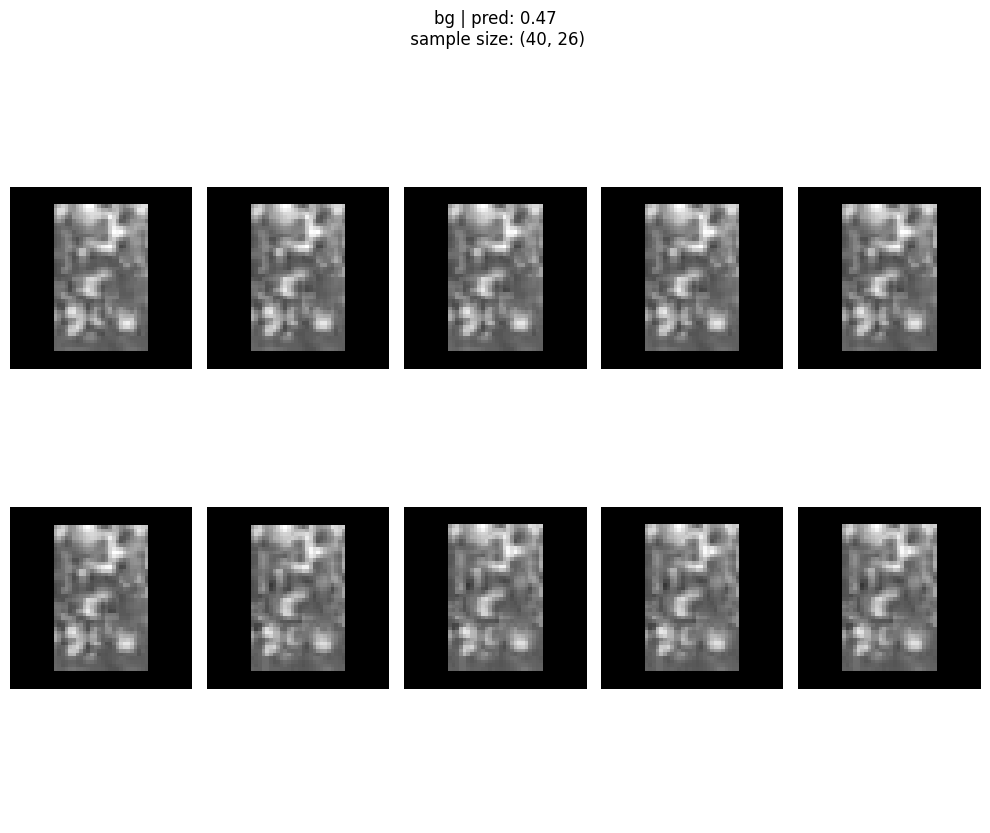

In [5]:
idx = -350
sample, gt, meta = val_dataset[idx]
sampl_, gt_, s_size_ = val_dataset_non[idx]
pred = model(sample.unsqueeze(0))
show_pred(sampl_, gt, pred, meta['size'])

In [6]:
len(val_dataset)

2739

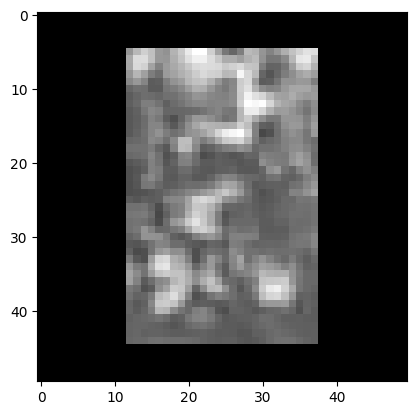

In [7]:
plt.imshow(sampl_[0], cmap='gray')

In [8]:
torch.tensor(std).shape

torch.Size([10])

In [9]:
mean = [0.485, 0.456, 0.406, 0.485, 0.456, 0.406,0.485, 0.456, 0.406, 0.406]
std = [0.229, 0.224, 0.225, 0.229, 0.224, 0.225, 0.229, 0.224, 0.225, 0.225]

In [10]:
inp = sample.numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406, 0.485, 0.456, 0.406,0.485, 0.456, 0.406, 0.406])
std = np.array([0.229, 0.224, 0.225, 0.229, 0.224, 0.225, 0.229, 0.224, 0.225, 0.225])
inp = std * inp + mean
inp = np.clip(inp, 0, 1)

In [11]:
vis_sample = sample.numpy().transpose((1, 2, 0)) * np.array(std) + np.array(mean)
vis_sample = np.clip(vis_sample, 0, 1)

In [12]:
vis_sample.shape

(50, 50, 10)

In [13]:
inp.shape

(50, 50, 10)

In [14]:
inp.max()

0.7176470992565156

In [15]:
sample_, gt_, s__ = val_dataset_non[30]

In [16]:
path = val_dataset_non.path_list[30]
sample_np, gt_np = utils.load_pickle(path)

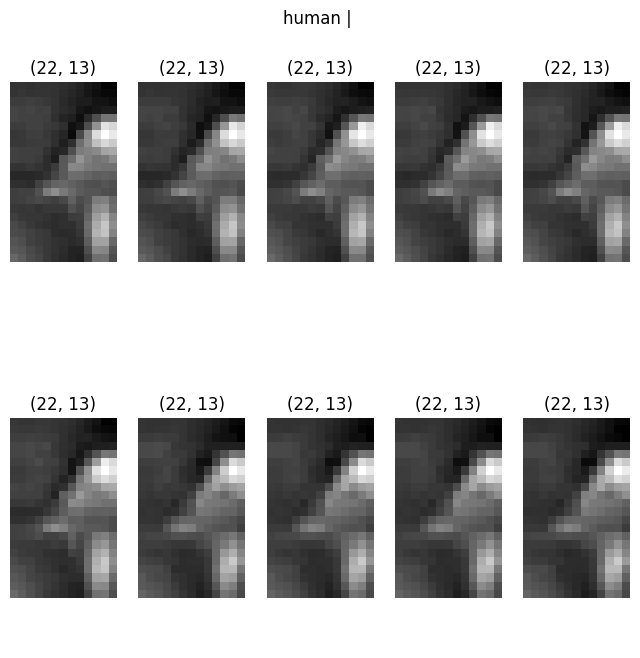

In [17]:
show_sample(sample_np, gt_np)

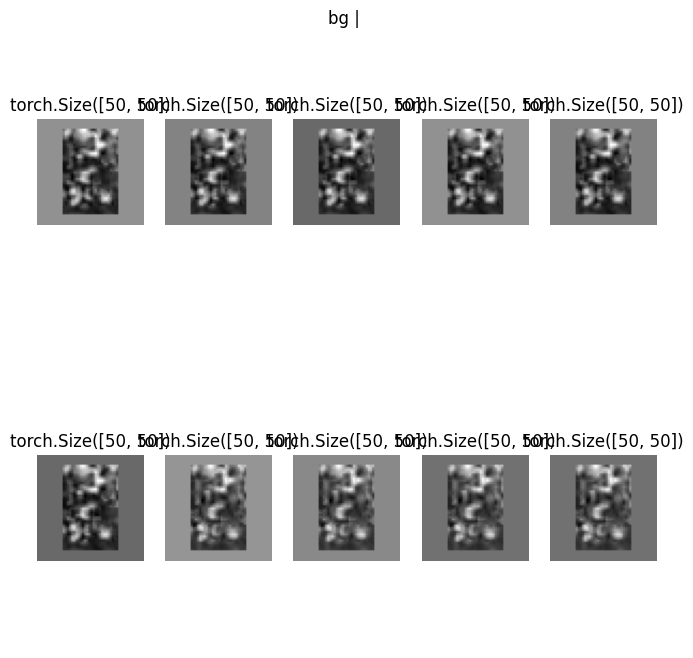

In [18]:
show_sample(sample, gt)

In [19]:
df = pd.read_csv("/home/max/ieos/small_obj/vid_pred/test_results/exp2.1/results.csv")

In [20]:
df.head()

,idx,pred,gt,acc,height,width,img_path
0,0,0.999729,1.0,1.0,25,20,data/human_data/window_vid_2_531.pickle
1,1,0.991498,1.0,1.0,18,15,data/human_data/window_vid_4_923.pickle
2,2,0.977275,1.0,1.0,41,22,data/human_data/window_vid_4_1849.pickle
3,3,0.999458,1.0,1.0,25,20,data/human_data/window_vid_2_404.pickle
4,4,0.999747,1.0,1.0,40,24,data/human_data/window_vid_2_1611.pickle


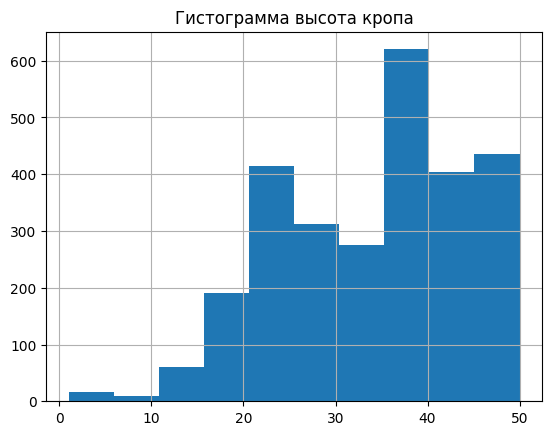

In [21]:
plt.hist(df['height'])
plt.title('Гистограмма высота кропа')
plt.grid('on')
plt.show()

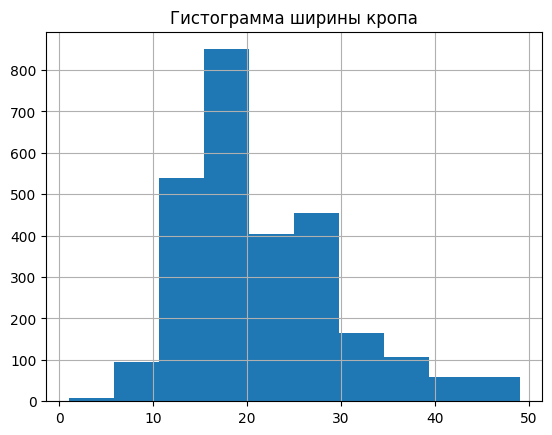

In [22]:
plt.hist(df['width'])
plt.title('Гистограмма ширины кропа')
plt.grid('on')
plt.show()

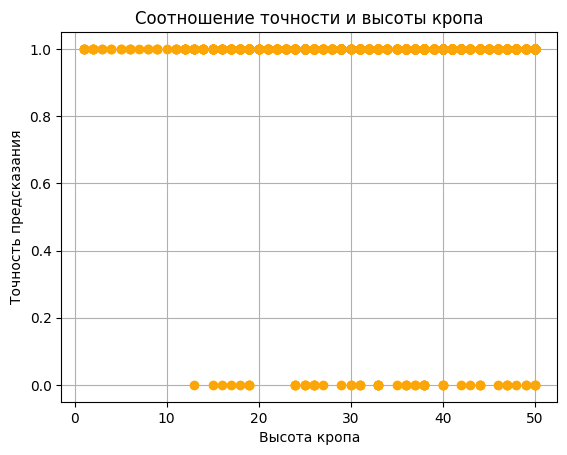

In [23]:
plt.scatter(df['height'], df['acc'], color='orange')
plt.title('Соотношение точности и высоты кропа')
plt.xlabel('Высота кропа')
plt.ylabel('Точность предсказания')
plt.grid('on')
plt.show()

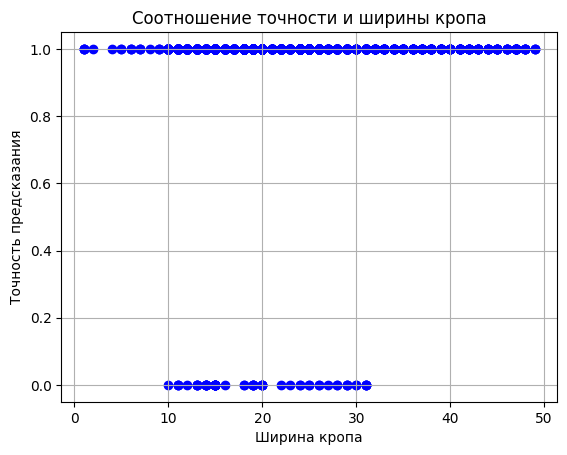

In [24]:
plt.scatter(df['width'], df['acc'], color='blue')
plt.title('Соотношение точности и ширины кропа')
plt.xlabel('Ширина кропа')
plt.ylabel('Точность предсказания')
plt.grid('on')
plt.show()

## train log

In [25]:
train_df = pd.read_csv("runs/exp2.1_obj_nblocks1_ep50/logs/logs.csv")

In [26]:
train_df

,epoch,loss,val_loss,acc,val_acc
0,0,0.346358,0.205611,0.853089,0.934472
1,1,0.175398,0.235452,0.932471,0.919937
2,2,0.127155,0.136080,0.954921,0.944767
3,3,0.121111,0.105792,0.954741,0.957728
4,4,0.098977,0.140994,0.963362,0.954578
5,5,0.092781,0.104482,0.966415,0.959302
6,6,0.085055,0.078993,0.970905,0.968629
7,7,0.082285,0.152367,0.970546,0.945736
8,8,0.082670,0.095936,0.969828,0.959302
9,9,0.069170,0.078986,0.977550,0.972020


In [27]:
df_melted = pd.melt(train_df, id_vars=['epoch'], value_vars=['loss', 'val_loss'], var_name='type', value_name='value')

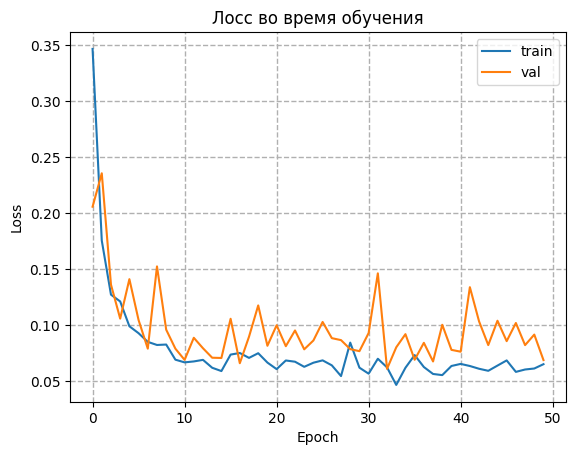

In [28]:
#sns.lineplot(data=df_melted, x='epoch', y='value', hue='type')

# Настройка отображения
plt.plot(train_df['epoch'], train_df['loss'], label='train')
plt.plot(train_df['epoch'], train_df['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Лосс во время обучения')
plt.legend()
plt.grid(linewidth=1, linestyle='--')
plt.show()

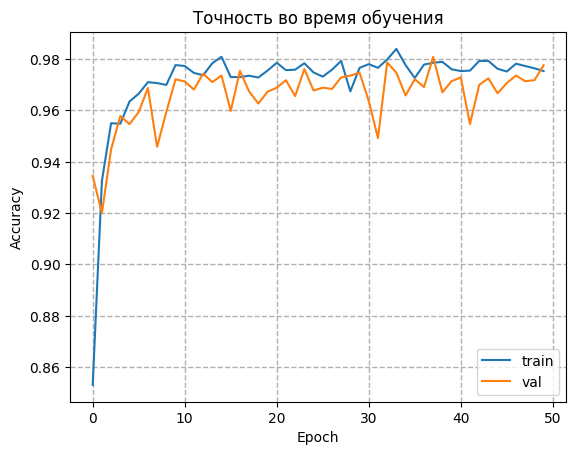

In [29]:
plt.plot(train_df['epoch'], train_df['acc'], label='train')
plt.plot(train_df['epoch'], train_df['val_acc'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Точность во время обучения')
plt.legend()
plt.grid(linewidth=1, linestyle='--')
plt.show()